[`Python` Version](https://www.kaggle.com/olgabelitskaya/sklearn-cookbook)

In [1]:
conn<-file("widhtml.R")
writeLines("
vfont_family<-c('Smokum','Akronim','Wallpoet',
                'Orbitron','Ewert','Lobster',
                'Roboto','Miss Fajardose','Monoton')
vfont_size<-c(8,10,12,14,16,18,20,22,24,26,28,30,32)
vfont_color<-c('#ff36ff','#ff3636','#3636ff',
               '#36ffff','#ff9636','#ff3696')

idhtml<-function(string,font_color=vfont_color[6],
                 font_family=vfont_family[2],
                 font_size=vfont_size[11]) {
    randi<-sample(1:9999999,1)
    s<-sapply(34,intToUtf8)
    html_str<-c(
      '<style>@import ',s,'https://fonts.',
      'googleapis.com/css?family=',font_family,
      s,'; #rh1',randi,' {font-family:',font_family,
      '; color:',font_color,'; font-size:',font_size,
      'px; text-shadow:3px 3px 3px #aaa;}</style>',
      '<h1 id=',s,'rh1',randi,s,';>',string,'</h1>')
    str<-paste0(html_str,collapse='')
    IRdisplay::display_html(str)}

ipyhtml<-function(font_color=vfont_color[6],
                 font_family=vfont_family[7],
                 font_size=vfont_size[2]) {
    html_str<-c(
        '<style>span {font-family:',font_family,
        '; color:black; text-shadow:3px 3px 3px #aaa;} ',
        'div.output_area pre{font-family:',
        '; font-size',font_size,'px; color:',
        font_color,';}</style>')
    str<-paste0(html_str,collapse='')
    IRdisplay::display_html(str)}  
",conn)

In [2]:
source('widhtml.R'); ipyhtml()
idhtml('Packages, Helpful Functions, and Styling')

Packages, Helpful Functions, and Styling

In [3]:
conn<-file("rpy_sklearn.R")
writeLines("
library(reticulate); library(imager)
library(IRdisplay); library(ggplot2)
pl<-c('matplotlib','pandas','sklearn',
      'seaborn','h5py','scikit-image')
for (p in pl) {py_install(p)} 
np<-import('numpy'); pd<-import('pandas')
sl<-import('sklearn'); sm<-import('skimage')
ks<-import('keras'); h5<-import('h5py')
pl<-import('pylab'); sn<-import('seaborn')
slds<-import('sklearn.datasets')
slpp<-import('sklearn.preprocessing')
slim<-import('sklearn.impute')
slfe<-import('sklearn.feature_extraction')
slms<-import('sklearn.model_selection')
slme<-import('sklearn.metrics')
sllm<-import('sklearn.linear_model')
slen<-import('sklearn.ensemble')
slne<-import('sklearn.neighbors')
slcl<-import('sklearn.cluster')
",conn)

In [4]:
source('rpy_sklearn.R')

Loading required package: magrittr


Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image



Attaching package: ‘IRdisplay’


The following object is masked from ‘package:imager’:

    display




Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...


In [5]:
ip<-function(x) {as.integer(x)}
N<-ip(5000)
ohe<-function(x) {
    x<-array_reshape(x,c(-1,1))
    tohe<-slpp$OneHotEncoder(categories='auto')
    as.matrix(tohe$fit(x)$transform(x)) }
tts<-function(X,y) {
    slms$train_test_split(X,y,test_size=.2,
                          random_state=ip(1))}

In [6]:
idhtml('Data')
idhtml('internal datasets',font_size=24)

Data

internal datasets

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506  13 506

Figure(1000x1000)

<seaborn.axisgrid.PairGrid>

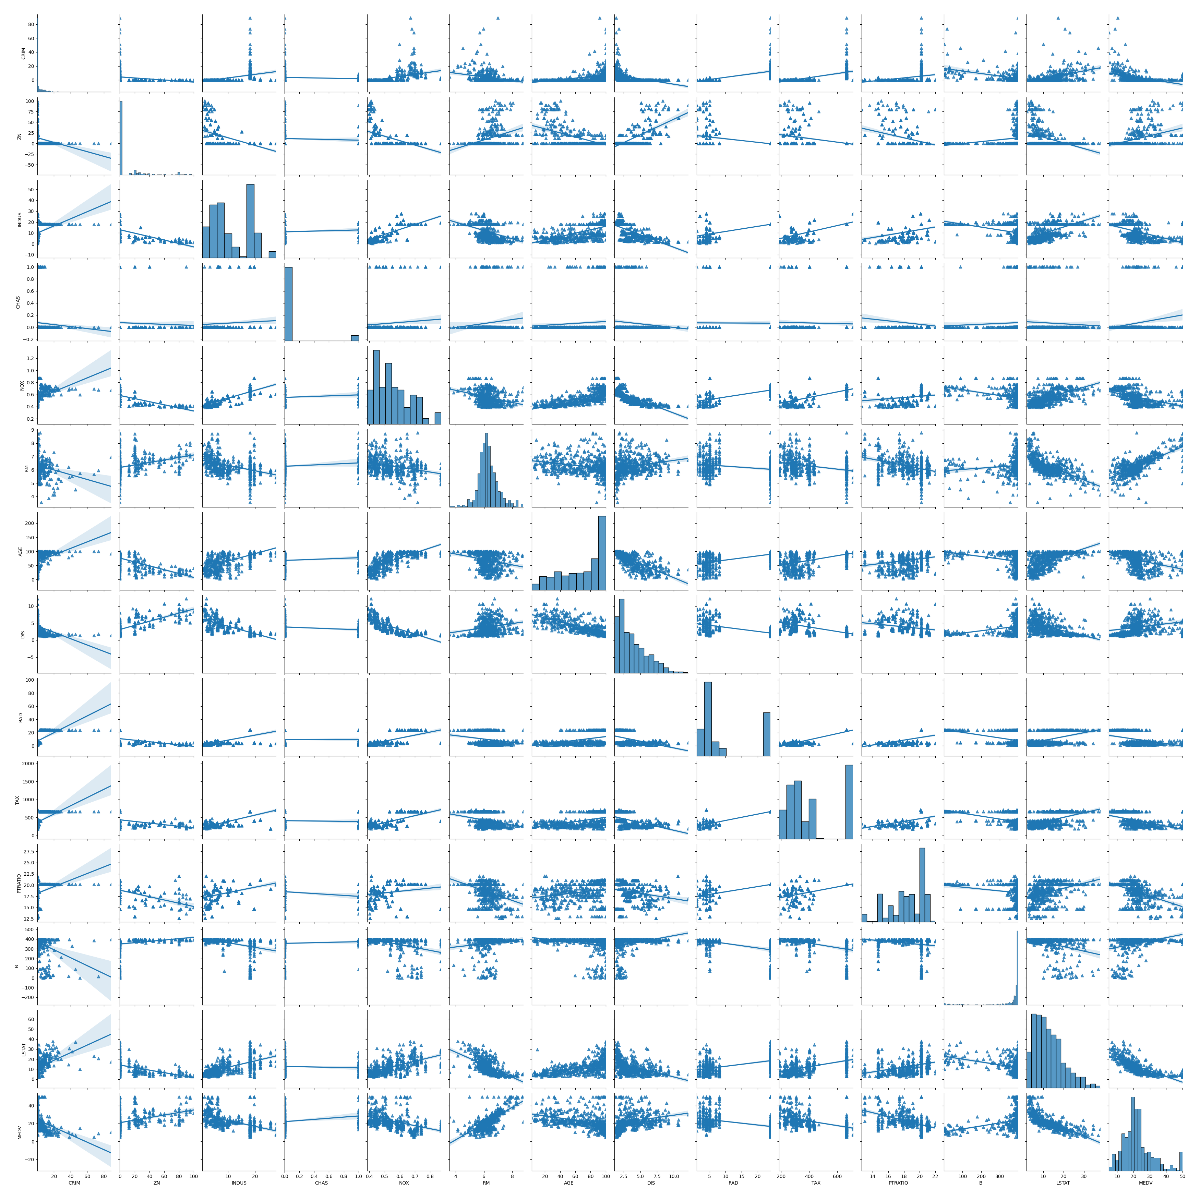

In [7]:
boston<-slds$load_boston()
dfboston<-data.frame(boston$data)
colnames(dfboston)<-boston$feature_names
dfboston['MEDV']<-boston$target
digits<-slds$load_digits()
X1<-boston$data; y1<-boston$target
head(dfboston); c(dim(X1),dim(y1))
pl$figure(figsize=c(10,10))
sn$pairplot(dfboston,kind="reg",markers='^')
pl$savefig('rpy_p1.png'); im<-load.image('rpy_p1.png')
options(repr.plot.width=10,repr.plot.height=10)
par(mar=c(0,0,0,0)); plot(im,axes=F)

[1] 1797   64 1797

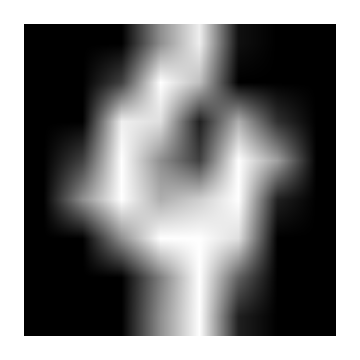

In [8]:
digits<-slds$load_digits()
X2<-digits$data; y2<-digits$target
par(mar=c(1,1,1,1)); n<-sample(dim(X2)[1],1)
im<-array_reshape(X2[n,]/max(X2),c(8,8))
options(repr.plot.width=3,repr.plot.height=3)
plot(as.raster(im)); c(dim(X2),dim(y2))

In [9]:
idhtml('artificial datasets',font_size=24)

artificial datasets

[1] 5000    5 5000

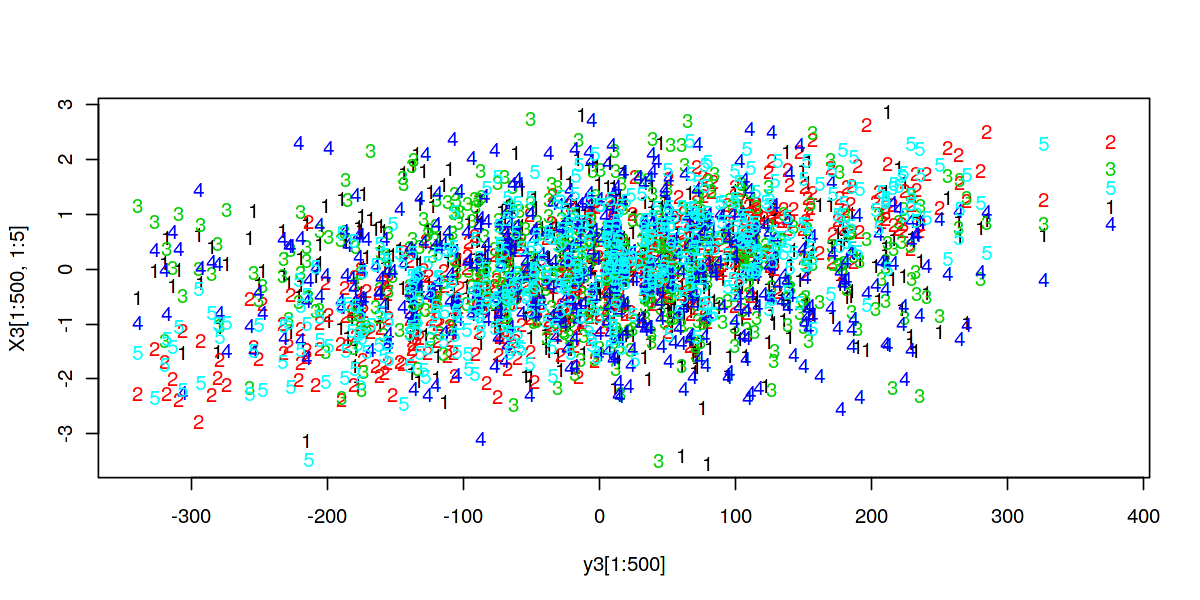

In [10]:
# 5000x5 matrix with 5 features (4 responsible for targets), 
# 1 target, 0.97 - the bias factor
artreg<-slds$make_regression(N,ip(5),ip(4),ip(1),.97)
nX3<-np$array(artreg[1]); ny3<-np$array(artreg[2])
X3<-array_reshape(nX3,c(N,5)); y3<-array_reshape(ny3,N)
options(repr.plot.width=10,repr.plot.height=5)
matplot(y3[1:500],X3[1:500,1:5],type='p')
c(dim(X3),dim(y3))

Figure(1000x500)

<matplotlib.collections.PathCollection>

<matplotlib.collections.PathCollection>

[1] 5000    2 5000

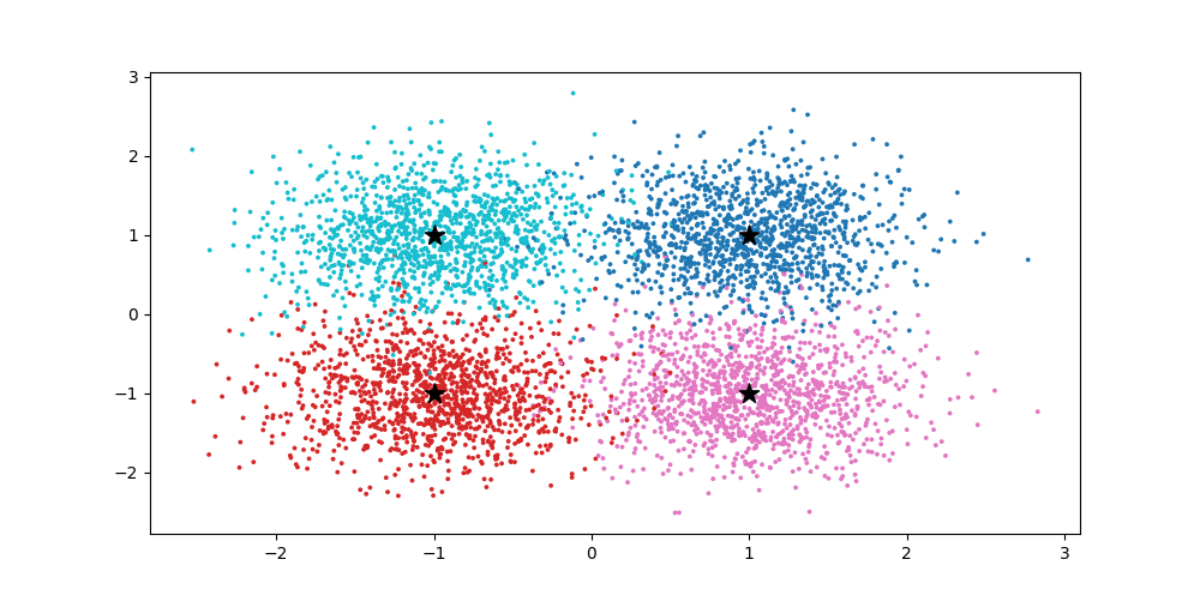

In [11]:
ce<-array_reshape(c(1,1,-1,-1,1,-1,-1,1),c(4,2))
artclu<-slds$make_blobs(n_samples=N,cluster_std=.5,centers=ce)
nX4<-np$array(artclu[1]); ny4<-np$array(artclu[2])
X4<-array_reshape(nX4,c(N,2)); y4<-array_reshape(ny4,N)
pl$figure(figsize=c(10,5))
pl$scatter(X4[,1],X4[,2],c=y4,s=3,
           cmap=pl$cm$tab10)
pl$scatter(c(1,-1,1,-1),c(1,-1,-1,1),
           c='black',marker='*',s=150)
pl$savefig('rpy_p1.png'); im<-load.image('rpy_p1.png')
options(repr.plot.width=10,repr.plot.height=5)
par(mar=c(0,0,0,0)); plot(im,axes=F)
c(dim(X4),dim(y4))

Figure(1000x500)

[1] 5000    2 5000    3

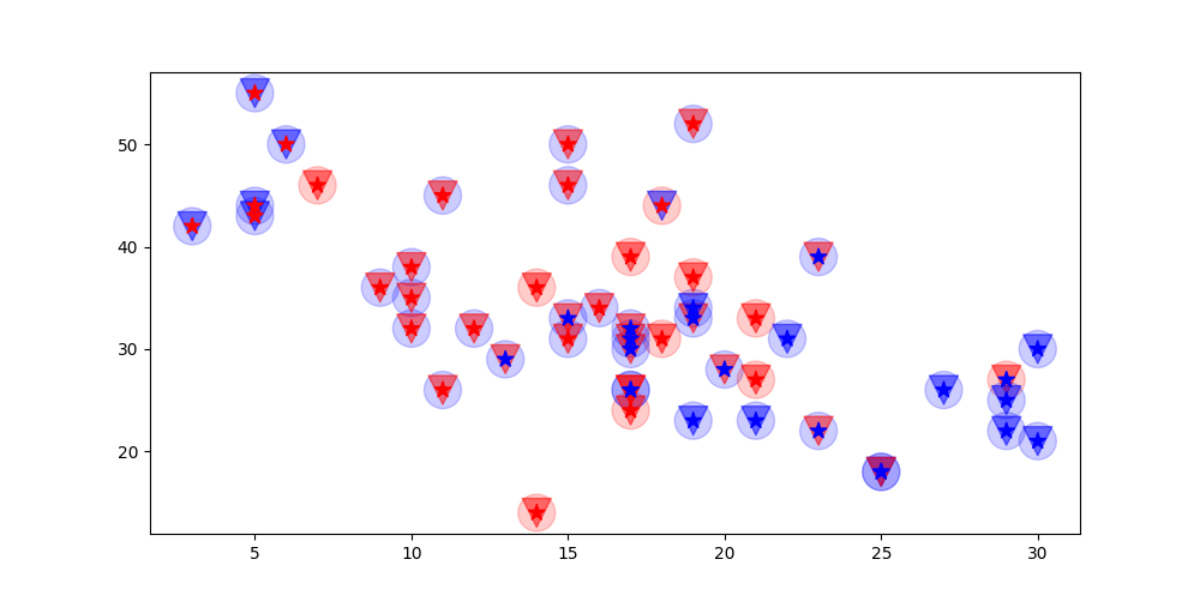

In [12]:
artmlc<-slds$make_multilabel_classification(n_classes=ip(3),
                                            n_samples=N,
                                            n_features=ip(2))
nX5<-np$array(artmlc[[1]]); ny5<-np$array(artmlc[[2]])
X5<-array_reshape(nX5,c(N,2)); y5<-array_reshape(ny5,c(N,3))
m=c('o','v','*'); a=c(.2,.5,1); s=c(500,300,100)
pl$figure(figsize=c(10,5))
for (i in 1:3) {
    pl$scatter(X5[1:50,1],X5[1:50,2],c=y5[1:50,i],s=s[i],
               marker=m[i],alpha=a[i],cmap=pl$cm$bwr)}
pl$savefig('rpy_p1.png'); im<-load.image('rpy_p1.png')
options(repr.plot.width=10,repr.plot.height=5)
par(mar=c(0,0,0,0)); plot(im,axes=F)
c(dim(X5),dim(y5))

In [13]:
idhtml('external datasets',font_size=24)

external datasets

[1] 60000   784 60000 10000   784 10000

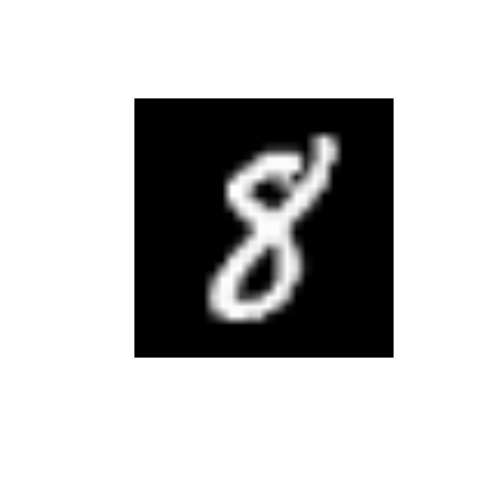

In [14]:
mnist<-ks$datasets$mnist$load_data()
train6<-mnist[[1]]; test6<-mnist[[2]]
X_train6<-array_reshape(np$array(train6[[1]]),c(60000,784))
X_train6<-X_train6/max(X_train6)
y_train6<-np$array(train6[[2]])
X_test6<-array_reshape(np$array(test6[[1]]),c(10000,784))
X_test6<-X_test6/max(X_test6)
y_test6<-np$array(test6[[2]])
c(dim(X_train6),dim(y_train6),dim(X_test6),dim(y_test6))
im<-array_reshape(X_train6[n,],c(28,28))
options(repr.plot.width=4,repr.plot.height=4)
plot(as.raster(im))

<KeysViewHDF5 ['backgrounds', 'images', 'labels']>

[1] 14190  3072 14190

[1] "а"

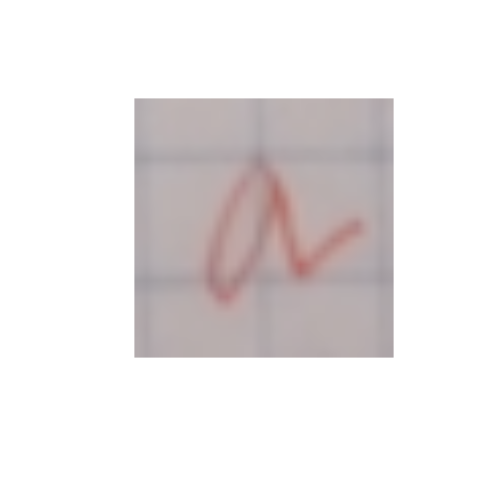

In [15]:
fpath<-'../input/classification-of-handwritten-letters/'
fname<-'LetterColorImages_123.h5'
f<-h5$File(paste0(fpath,fname),'r')
keys<-list(f$keys())
letters<-'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
X7<-array_reshape(np$array(f['images'])/255,c(-1,32*32*3))
y7<-np$array(f['labels'])
keys[[1]]; c(dim(X7),dim(y7))
im<-array_reshape(X7[n,],c(32,32,3))
options(repr.plot.width=4,repr.plot.height=4)
plot(as.raster(im)); substring(letters,y7[n],y7[n]) 

In [16]:
idhtml('Extraction and Preprocessing')

Extraction and Preprocessing

'data.frame':	6 obs. of  2 variables:
 $ city       : chr  "Hanoi" "Frankfurt" "Houston" "Riyadh" ...
 $ temperature: int  33 16 28 38 17 27
 - attr(*, "pandas.index")=Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
'data.frame':	6 obs. of  2 variables:
 $ city       : chr  "Hanoi" "Frankfurt" "Houston" "Riyadh" ...
 $ temperature: int  33 16 28 38 17 27


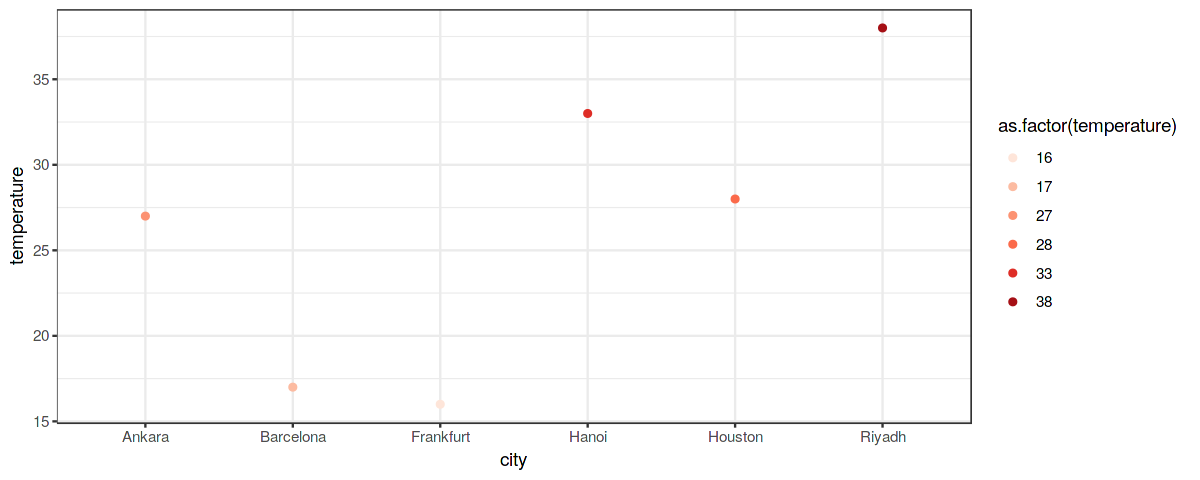

In [17]:
arr1<-c('Hanoi','Frankfurt','Houston',
        'Riyadh','Barcelona','Ankara')
arr2<-c(33,16,28,38,17,27)
tmp<-pd$DataFrame(np$nan,index=1:6,
                  columns=c('city','temperature'))
tmp$city<-arr1; tmp$temperature<-as.integer(arr2)
tmp2<-data.frame(cbind(arr1,arr2))
colnames(tmp2)<-c('city','temperature')
tmp2<-transform(tmp2,city=as.character(city),
                temperature=as.integer(as.character(temperature)))
options(repr.plot.width=10,repr.plot.height=4)
ggplot(tmp,aes(x=city,y=temperature,color=as.factor(temperature)))+
    scale_color_brewer(palette="Reds")+
    geom_point()+theme_bw()
str(tmp); str(tmp2)

[1] "have"    "you"     "already" "set"     "your"    "goals"   "for"    
 [8] "the"     "new"     "year"

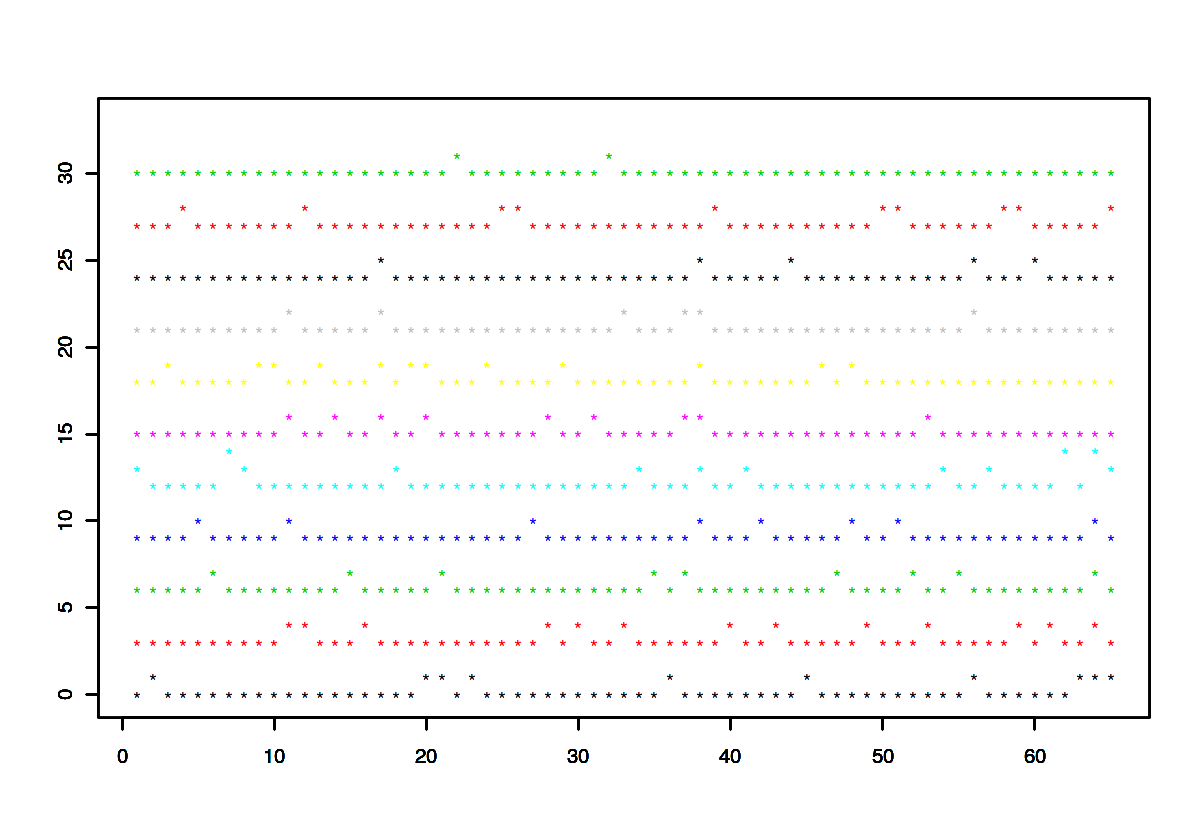

In [18]:
corpus=c('Have you already set your goals for the New Year?',
         paste0('Do you want to lose ten kilos, ',
                'run a marathon or speak fluent English?'), 
         'Some experts believe that you need systems, not goals.',
         'A system is something you do on a regular basis.',
         paste0('This means focusing on what you can control ',
                '(your actions) rather than what you can’t.'),
         'For example, do not focus on losing ten kilos.',
         paste0('Focus on shopping for healthy food and ',
                'cooking something light every day.'),
         'Do not focus on the marathon.',
         'Focus on the training schedule.',
         paste0('Invent a system to improve your English, ',
                'one step at a time.'),
         'Good luck!')
cv<-slfe$text$CountVectorizer(max_df=100)
corpus_features<-cv$fit_transform(np$array(corpus,dtype='object'))
options(repr.plot.width=10,repr.plot.height=7)
for (i in 1:11){matplot(corpus_features[i,]+3*(i-1),xlab='',ylab='',
                        pch='*',ylim=c(0,33),col=i); par(new=TRUE)}
ca<-cv$build_analyzer(); ca(corpus[1])

In [19]:
m<-sample(1:1700,1)
cy2<-ohe(y2); c(cy2[m,],y2[m])
cy_train6<-ohe(y_train6); c(cy_train6[m,],y_train6[m])
cy_test6<-ohe(y_test6); c(cy_test6[m,],y_test6[m])
cy7<-ohe(y7); c(cy7[m,],y7[m])

[1] 0 0 1 0 0 0 0 0 0 0 2

[1] 0 0 0 0 0 0 1 0 0 0 6

[1] 0 0 0 0 0 0 0 0 1 0 8

[1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

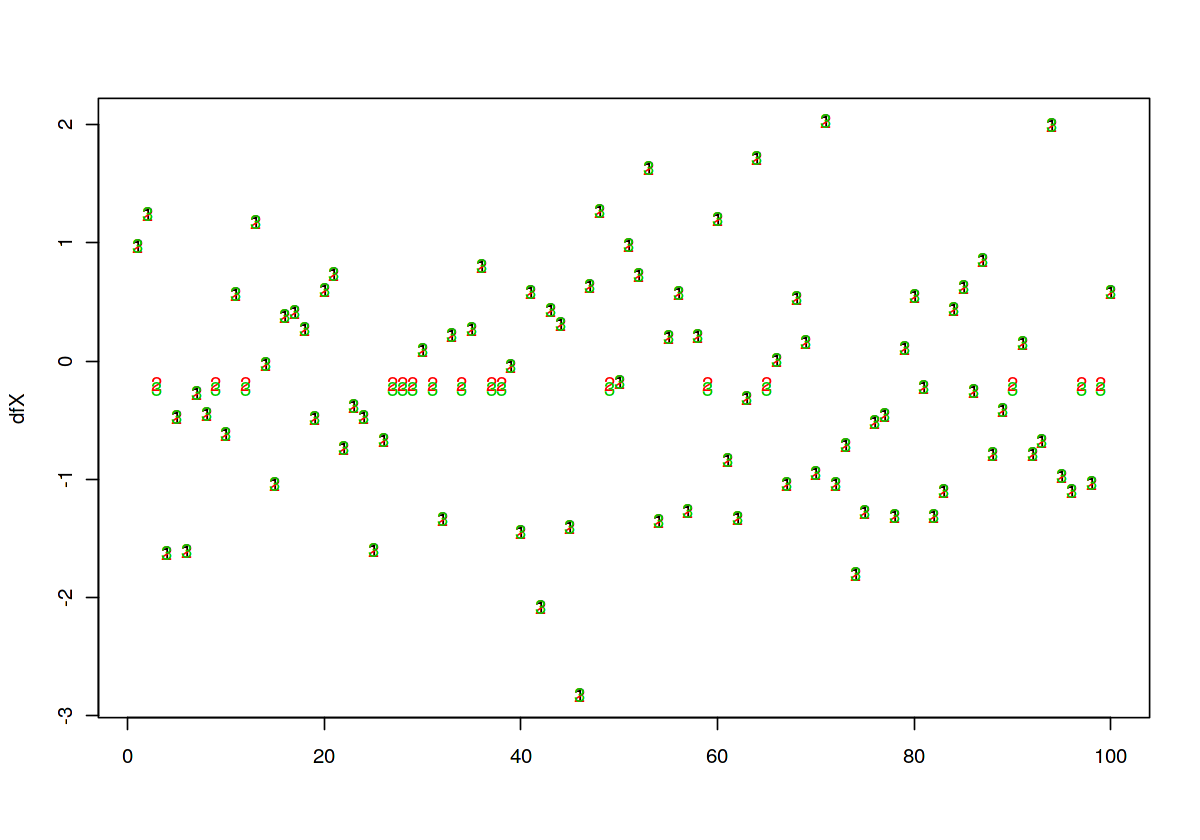

In [20]:
X<-np$random$randn(ip(100))
ch<-np$random$choice(ip(100),ip(20))
X[ch]<-np$nan
X<-np$reshape(X,c(ip(100),ip(1)))
mean_imp<-slim$SimpleImputer(strategy='mean')
median_imp<-slim$SimpleImputer(strategy='median')
dfX<-pd$DataFrame(cbind(X,mean_imp$fit(X)$transform(X),
                        median_imp$fit(X)$transform(X)))
matplot(dfX,type='p')

In [21]:
X_train1<-tts(X1,y1)[[1]]; X_test1<-tts(X1,y1)[[2]]
y_train1<-tts(X1,y1)[[3]]; y_test1<-tts(X1,y1)[[4]]
c(dim(X_train1),dim(y_train1),dim(X_test1),dim(y_test1))
X_train2<-tts(X2,y2)[[1]]; X_test2<-tts(X2,y2)[[2]]
y_train2<-tts(X2,y2)[[3]]; y_test2<-tts(X2,y2)[[4]]
c(dim(X_train2),dim(y_train2),dim(X_test2),dim(y_test2))
X_train7<-tts(X7,y7)[[1]]; X_test7<-tts(X7,y7)[[2]]
y_train7<-tts(X7,y7)[[3]]; y_test7<-tts(X7,y7)[[4]]
c(dim(X_train7),dim(y_train7),dim(X_test7),dim(y_test7))

[1] 404  13 404 102  13 102

[1] 1437   64 1437  360   64  360

[1] 11352  3072 11352  2838  3072  2838

In [22]:
idhtml('Classification')

Classification

In [23]:
clf<-slne$KNeighborsClassifier()
clf$fit(X_train2,y_train2)    
y_clf_train2<-clf$predict(X_train2)
y_clf_test2<-clf$predict(X_test2)        
acc_clf_train2<-slme$accuracy_score(y_train2,y_clf_train2)
acc_clf_test2<-slme$accuracy_score(y_test2,y_clf_test2)
c(acc_clf_train2,acc_clf_test2)
#y_clf_test2

KNeighborsClassifier()

[1] 0.9881698 0.9944444

In [24]:
clf<-slen$GradientBoostingClassifier()
clf$fit(X_train6[1:10000,],y_train6[1:10000])    
y_clf_train6<-clf$predict(X_train6[1:10000,])
y_clf_test6<-clf$predict(X_test6[1:2000,])        
acc_clf_train6<-slme$accuracy_score(y_train6[1:10000],y_clf_train6)
acc_clf_test6<-slme$accuracy_score(y_test6[1:2000],y_clf_test6)
c(acc_clf_train6,acc_clf_test6)

GradientBoostingClassifier()

[1] 0.9899 0.8975

In [25]:
clf<-slen$RandomForestClassifier()
clf$fit(X_train7,y_train7)    
y_clf_train7<-clf$predict(X_train7)
y_clf_test7<-clf$predict(X_test7)        
acc_clf_train7<-slme$accuracy_score(y_train7,y_clf_train7)
acc_clf_test7<-slme$accuracy_score(y_test7,y_clf_test7)
c(acc_clf_train7,acc_clf_test7)

RandomForestClassifier()

[1] 1.0000000 0.3893587

In [26]:
idhtml('Regression')

Regression

In [27]:
reg1<-slen$GradientBoostingRegressor()
reg1$fit(X_train1,y_train1)    
y_reg_train11<-reg1$predict(X_train1)
y_reg_test11<-reg1$predict(X_test1)        
r2_reg_train11<-slme$r2_score(y_train1,y_reg_train11)
r2_reg_test11<-slme$r2_score(y_test1,y_reg_test11)
c(r2_reg_train11,r2_reg_test11)
reg2<-slne$KNeighborsRegressor()
reg2$fit(X_train1,y_train1)    
y_reg_train12<-reg2$predict(X_train1)
y_reg_test12<-reg2$predict(X_test1)        
r2_reg_train12<-slme$r2_score(y_train1,y_reg_train12)
r2_reg_test12<-slme$r2_score(y_test1,y_reg_test12)
c(r2_reg_train12,r2_reg_test12)

GradientBoostingRegressor()

[1] 0.9779147 0.9207345

KNeighborsRegressor()

[1] 0.6836784 0.5401612

Figure(1000x500)

<matplotlib.collections.PathCollection>

[[1]]
Line2D(Gradient Boosting)


[[1]]
Line2D(KNeighbors)


Text(0.5, 0, 'Observations')

Text(0, 0.5, 'Targets')

Text(0.5, 1.0, 'Regressors. Test Results. Boston')

Legend

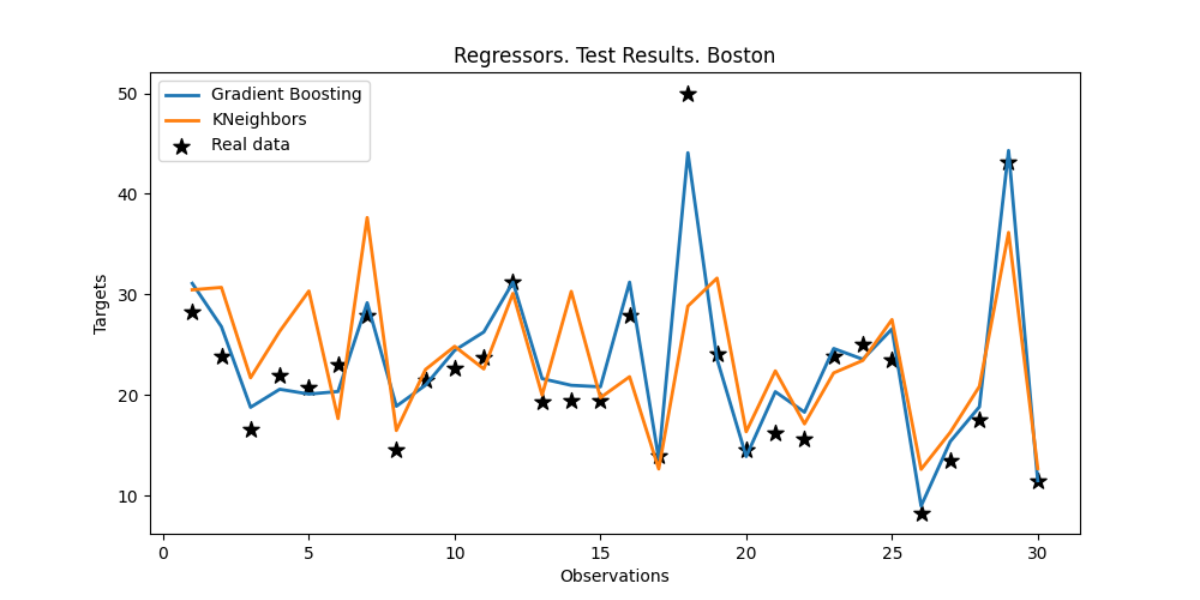

In [28]:
pl$figure(figsize=c(10,5)); k<-30
pl$scatter(1:k,y_test1[1:k],marker='*',s=100,
           color='black',label='Real data')
pl$plot(1:k,y_reg_test11[1:k],lw=2,label='Gradient Boosting')
pl$plot(1:k,y_reg_test12[1:k],lw=2,label='KNeighbors')
pl$xlabel('Observations'); pl$ylabel('Targets')
pl$title('Regressors. Test Results. Boston')
pl$legend(loc=2,fontsize=10)
pl$savefig('rpy_p1.png'); im<-load.image('rpy_p1.png')
options(repr.plot.width=10,repr.plot.height=5)
par(mar=c(0,0,0,0)); plot(im,axes=F)

In [29]:
idhtml('Interactive Py Practice')
url<-paste0('https://olgabelitskaya.github.io/',
            'sklearn_cookbook_sagecells.html')
html_str<-c('<div style="border:10px double white; ',
    'width:680px; height:630px; overflow:auto; ',
    'padding:5px; background-color:ghostwhite">',
    '<iframe src="',url,
    '" width="650" height="600"/></div>')
html_str<-(paste0(html_str,collapse=''))
IRdisplay::display_html(html_str)

Interactive Py Practice